### MISSION: SYNTHESIZE A CLUSTERED DATASET: 
<b>Create a function that spits out k clusters of N people. 
For each person, the x-variable will designate age, the y-variable will designate income.

---

## 0. REQUISITES:

#### random.uniform: Any value within the given interval is equally likely to be drawn by uniform

In [548]:
random.uniform(1,11)

7.166017939069962

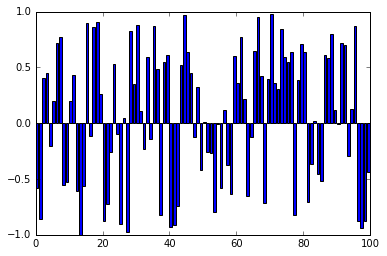

In [549]:
test_uniform = random.uniform(-1,1,100)
plt.bar(range(len(test_uniform)),test_uniform)
plt.show()

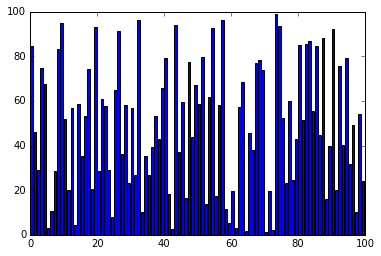

In [550]:
test_uniform = random.uniform(1,100,100)
plt.bar(range(len(test_uniform)),test_uniform)
plt.show()

In [551]:
np.mean(test_uniform)

48.90271265126227

### random.normal: Draw random samples from a normal (Gaussian) distribution.

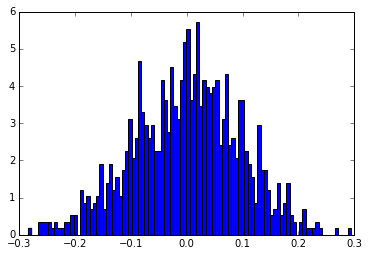

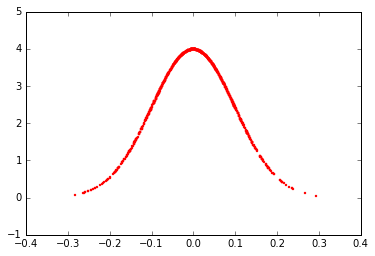

In [552]:
import scipy.stats as st

mean = 0
std = 0.1

s = np.random.normal(mean,std,1000)
plt.hist(s,100,normed = True)

plt.show()

pdf = st.norm.pdf(s,mean,std)
plt.scatter(s,pdf,s=2,color='r')
plt.show()

<b>Here you either have a uniform distribution or a normal distribution, but what if you had one OF the other?

In [553]:
mean = 0
std = 1

In [554]:
uniform = np.random.uniform(mean,std,1000)
uniform[:52]

array([0.531698551518, 0.306208694853, 0.794651205247, 0.0145986699229,
       0.381508536498, 0.655213045796, 0.41189702035, 0.690972208511,
       0.570053495188, 0.554895196335, 0.162068757882, 0.35036422856,
       0.765937259143, 0.0748629994327, 0.80862923783, 0.241341463437,
       0.393423314372, 0.467156504063, 0.207175951006, 0.913840144136,
       0.688435275299, 0.00131213356619, 0.802888132078, 0.192368060678,
       0.410850445779, 0.828047923269, 0.916628132689, 0.92475994142,
       0.594074377524, 0.321581024821, 0.84239467502, 0.527249807804,
       0.932940537665, 0.555776755814, 0.217281322488, 0.616175020278,
       0.530721011099, 0.744943537895, 0.432382941271, 0.961267460214,
       0.330142459673, 0.0274810420574, 0.780194633025, 0.45841325336,
       0.741023927311, 0.210951444061, 0.338252924466, 0.112441736859,
       0.453852444487, 0.0365192299227, 0.649135023904, 0.581485435677])

---

><b>NORMAL DIST:

In [555]:
mean = 0
std = 1

normal_dist = random.normal(mean,std,1000)
normal_dist[:52]

array([0.990988859774, -0.952098359856, 1.59195350625, -0.168788186665,
       -0.731269856131, 0.0580902388842, -1.16621890823, -2.01752118136,
       0.131971690674, -1.89202136104, -0.341391440226, -0.745594676567,
       -2.40371200015, -1.18332443089, 1.14943002549, -3.13984444263,
       1.76042935891, -0.406478216585, -0.651738795681, 0.375035996862,
       0.13687562657, -1.27387396756, -1.16094066851, 1.39356751707,
       -0.999800828534, 0.467770918597, 0.143951590326, 1.28190981928,
       2.37158091279, 0.636735500601, 0.119516848025, 0.0541003254295,
       -0.843283138485, 1.03741567421, -2.0507767008, -0.785047693374,
       -1.36710422221, 1.59607615503, 0.607454559028, -0.1282022875,
       0.408617009467, 0.21755838903, 0.484063592816, 1.06525227751,
       0.144724211073, 0.0609314122976, -2.22794391474, 0.300308782116,
       -1.35053523099, -0.236968758779, -1.44487258319, -2.44794758325])

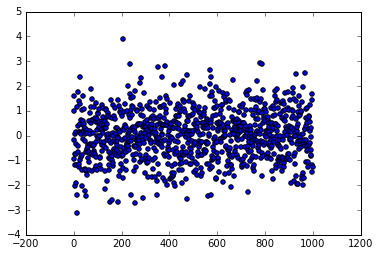

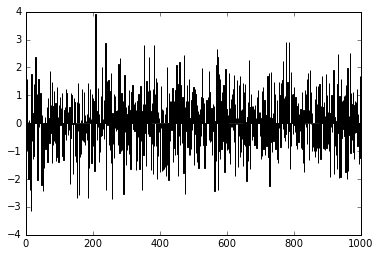

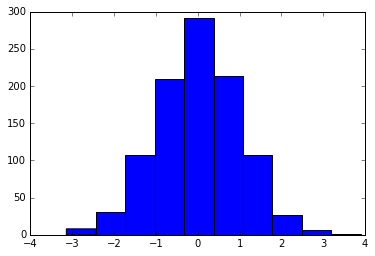

In [556]:
plt.scatter(range(len(normal_dist)),normal_dist)
plt.show()
plt.bar(range(len(normal_dist)),normal_dist)
plt.show()
plt.hist(normal_dist)
plt.show()

---

## 1)  CREATE >ONE< RANDOM CLUSTER:

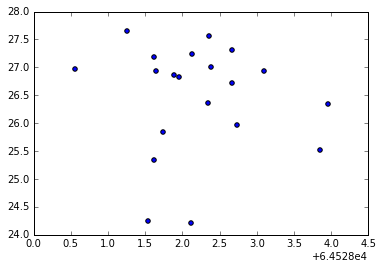

In [558]:
# N = Number of people
def createClusteredData(N):
    
    # X_DATA_SET
    X = []

    #Pick a random center x & y cooridnate around which the income/age data will cluster
    #Use random.uniform(floor,ceiling)
    income_center_x = random.uniform(20000,100000) 
    age_center_y = random.uniform(20,70)
    
    #For each person in the cluster: 
    #Pick a random point normally distributed around the center
    #using random.normal(mean,std)
    for x in range(N):
        X.append([random.normal(income_center_x),random.normal(age_center_y)])
    
    
    #CONVERT X LIST TO ARRAY
    X = array(X)
    return X

cluster1 = createClusteredData(20)
plt.scatter([x[0] for x in cluster1],[x[1] for x in cluster1])

#### 2. CREATE k NUMBER OF CLUSTERS

In [559]:
from __future__ import division

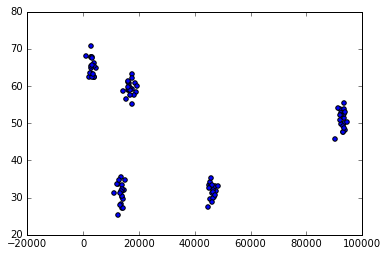

In [574]:
# N = Number of people
def createClusteredData(N,k):
    
    people_per_cluster = N/k
    
    # X_DATA_SET
    X = []
    
    
    #For each person out of N-total people, in each cluster out of k-total people: 
    #Pick a random point normally distributed around the center. (k total points per cluster)
    #using random.normal(mean,std)
    
    for x in range(k):
        income_center_x = random.uniform(2000,100000) 
        age_center_y = random.uniform(20,70)
        
        #for each cluster, fill list wth normal distributions around x and y centers
        #with x_std = 1000 and y_std = 2
        for y in range(int(people_per_cluster)):
            X.append([random.normal(income_center_x,1000),random.normal(age_center_y,2)])
    
    
    #CONVERT X LIST TO ARRAY
    X = array(X)
    return X

cluster1 = createClusteredData(100,5)
plt.scatter([x[0] for x in cluster1],[x[1] for x in cluster1])

### 3. MAKE EACH CLUSTER IDENTIFIABLE BY AN INTEGER AGAINST WHICH TO VALIDATE PREDICTIONS:

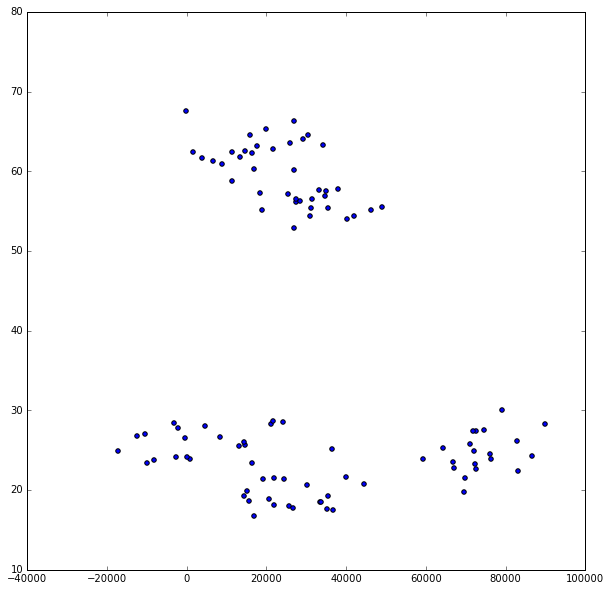

In [564]:
# N = Number of people
def createClusteredData(N,k):
    
    people_per_cluster = N/k
    
    # X_DATA_SET
    # ***y is the actualnumber_assignment of each cluster***
    X = []
    y = []
    
    
    #For each person out of N-total people, in each cluster out of k-total people: 
    #Pick a random point normally distributed around the center. (k total points per cluster)
    #using random.normal(mean,std)
    
    for x in range(k):
        income_center_x = random.uniform(2000,100000) 
        age_center_y = random.uniform(20,70)
        
        #for each cluster, fill list wth normal distributions around x and y centers
        #with x_std = 1000 and y_std = 2
        for value in range(int(people_per_cluster)):
            X.append([random.normal(income_center_x,9000),random.normal(age_center_y,2)])
            y.append(x)
    
    #CONVERT X LIST TO ARRAY
    X = array(X)
    return X,y

cluster1 = createClusteredData(100,5)
plt.rcParams['figure.figsize'] = (10,10)
plt.scatter([x[0] for x in cluster1[0]],[x[1] for x in cluster1[0]])

In [565]:
np.save('cluster1_data',cluster1[0])

In [566]:
np.load('cluster1_data.npy')[:10]

array([[33292.5946262, 57.6242507231],
       [27284.6819154, 56.1470503058],
       [28468.5118612, 56.3202430439],
       [31442.4352906, 56.5039111129],
       [34639.9402092, 56.9516973778],
       [35504.3167372, 55.3913136217],
       [18759.3069249, 55.1098139775],
       [11271.37959, 58.7719601833],
       [30995.1309611, 54.4273841898],
       [31248.4363035, 55.4017967057]])

In [567]:
np.save('cluster1_answers',cluster1[1])

In [568]:
np.load('cluster1_answers.npy')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

### >>>Now we are ready to run clustering workflows on this synthetic data<<<

---

## CODEX:

In [569]:
from __future__ import division
import random
import numpy as np
from numpy import random, array, float
import matplotlib.pyplot as plt
%matplotlib inline